In [1]:
import numpy
import skimage.io

import ivvv

In [2]:
image = skimage.io.imread("/Users/agoodman/Downloads/AICS-10_5_5.ome.tif")

image = numpy.transpose(image, [0, 2, 3, 1])

/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


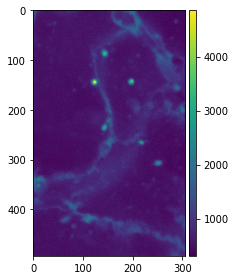

In [3]:
skimage.io.imshow(image[10, :, :, 0])

# (1.0, 0.41295546558704455, 0.954248366013072, 1.0)

In [5]:
ivvv.volshow(image, size=(512, 512), spacing=(1.0, 1.0, 4.0))

(1.0, 0.954248366013072, 0.41295546558704455, 1.0)


VolumeWidget(dimensions={'tile_width': 512, 'tile_height': 120, 'rows': 17, 'cols': 4, 'atlas_width': 2048, 'atlas_height': 2040, 'width': 471, 'height': 126, 'channels': 9, 'tiles': 65, 'channel_names': ['CH_0', 'CH_1', 'CH_2', 'CH_3', 'CH_4', 'CH_5', 'CH_6', 'CH_7', 'CH_8'], 'pixel_size_x': 1.0, 'pixel_size_y': 1.0, 'pixel_size_z': 4.0}, image=array([[[[13, 12, 12, ...,  9,  8,  9],
         [12, 13, 13, ...,  9,  8, 10],
         [10, 13, 11, ...,  9,  9,  8],
         ...,
         [ 9,  9, 10, ..., 11, 10, 11],
         [ 9,  9, 10, ..., 12,  9, 10],
         [ 9,  9, 11, ..., 10, 11, 10]],

        [[11, 12, 12, ..., 10,  8,  8],
         [13, 11, 12, ...,  8,  8,  9],
         [12, 13, 12, ...,  9,  8,  9],
         ...,
         [10, 10,  9, ..., 10, 11, 11],
         [11, 10,  8, ..., 10, 11, 10],
         [10, 10,  9, ..., 11, 10, 10]],

        [[12, 13, 12, ..., 10,  9,  8],
         [12, 14, 12, ...,  8,  9,  8],
         [12, 12, 12, ...,  9,  9,  8],
         ...,
         [ 9, 11, 10, ..., 11,  9, 11],
         [10, 11,  9, ..., 11, 10, 10],
         [10, 11, 10, ..., 11, 11, 11]],

        ...,

        [[ 6,  7,  6, ...,  6,  6,  8],
         [ 6,  6,  6, ...,  7,  6,  6],
         [ 6,  7,  7, ...,  6,  6,  7],
         ...,
         [ 6,  6,  6, ...,  5,  5,  6],
         [ 7,  6,  6, ...,  5,  5,  6],
         [ 7,  7,  6, ...,  5,  6,  5]],

        [[ 7,  7,  5, ...,  6,  5,  5],
         [ 5,  7,  7, ...,  7,  6,  6],
         [ 6,  6,  6, ...,  6,  6,  6],
         ...,
         [ 6,  7,  6, ...,  5,  5,  6],
         [ 6,  6,  7, ...,  6,  5,  5],
         [ 7,  7,  7, ...,  5,  6,  6]],

        [[ 6,  6,  6, ...,  5,  6,  5],
         [ 5,  5,  6, ...,  6,  5,  6],
         [ 6,  6,  5, ...,  5,  6,  6],
         ...,
         [ 8,  7,  8, ...,  5,  4,  5],
         [ 8,  8,  7, ...,  5,  6,  5],
         [ 7,  7,  8, ...,  5,  5,  5]]],


       [[[ 2,  2,  2, ...,  3,  3,  3],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  3,  2,  3],
         ...,
         [ 3,  3,  3, ...,  3,  2,  3],
         [ 3,  3,  3, ...,  2,  3,  2],
         [ 3,  3,  3, ...,  3,  3,  2]],

        [[ 2,  2,  2, ...,  2,  3,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  3,  3,  2],
         ...,
         [ 3,  2,  3, ...,  2,  2,  3],
         [ 3,  3,  2, ...,  2,  2,  2],
         [ 3,  2,  4, ...,  3,  3,  3]],

        [[ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  3],
         ...,
         [ 3,  2,  3, ...,  2,  2,  3],
         [ 3,  3,  3, ...,  3,  3,  2],
         [ 3,  3,  3, ...,  3,  3,  2]],

        ...,

        [[ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         ...,
         [ 3,  3,  3, ...,  3,  2,  3],
         [ 3,  3,  3, ...,  3,  2,  2],
         [ 3,  4,  3, ...,  3,  2,  3]],

        [[ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         ...,
         [ 3,  3,  3, ...,  2,  2,  2],
         [ 4,  4,  3, ...,  2,  2,  2],
         [ 4,  3,  3, ...,  2,  2,  2]],

        [[ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  3],
         [ 2,  2,  2, ...,  2,  2,  2],
         ...,
         [ 3,  3,  3, ...,  3,  2,  3],
         [ 3,  3,  3, ...,  3,  3,  2],
         [ 4,  3,  3, ...,  2,  2,  2]]],


       [[[ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         ...,
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2]],

        [[ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         ...,
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2],
         [ 2,  2,  2, ...,  2,  2,  2]],

        [[ 2,  2,  2, ...,  2,  2,  

In [ ]:
import scipy.ndimage

In [ ]:
skimage.io.imshow(scipy.ndimage.zoom(image[10, :, :, 0], (0.95, 0.4)))